#### Complete YOLOv8 Pipeline: Detection, Segmentation, Pose Estimation (Keypoints), & Classification on test-image using nano model

loading Detection Model...

image 1/1 c:\Users\Admin\Documents\research\tasks\..\assets\test-image.jpg: 448x640 1 person, 1 cup, 1 chair, 1 potted plant, 1 cell phone, 102.6ms
Speed: 4.8ms preprocess, 102.6ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


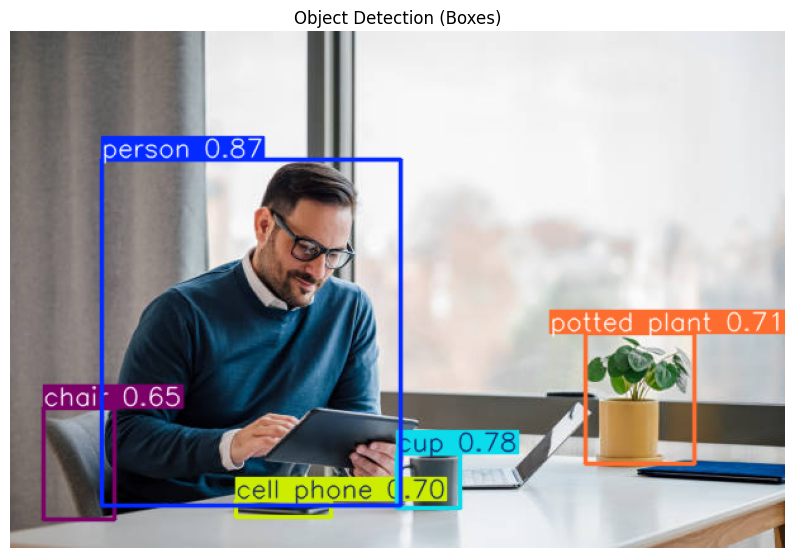

Loading Segmentation Model...

image 1/1 c:\Users\Admin\Documents\research\tasks\..\assets\test-image.jpg: 448x640 1 person, 1 cup, 1 chair, 1 potted plant, 107.0ms
Speed: 4.3ms preprocess, 107.0ms inference, 6.2ms postprocess per image at shape (1, 3, 448, 640)


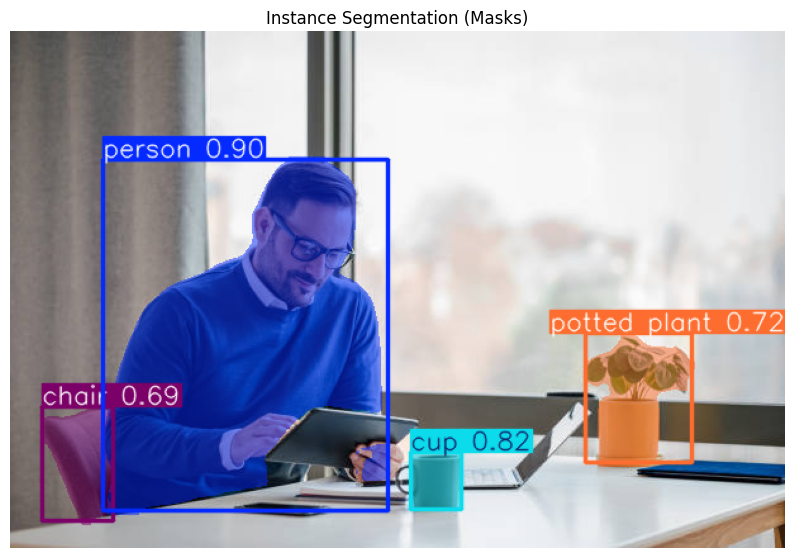

Loading Detection Model...

image 1/1 c:\Users\Admin\Documents\research\tasks\..\assets\test-image.jpg: 448x640 1 person, 90.1ms
Speed: 3.6ms preprocess, 90.1ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


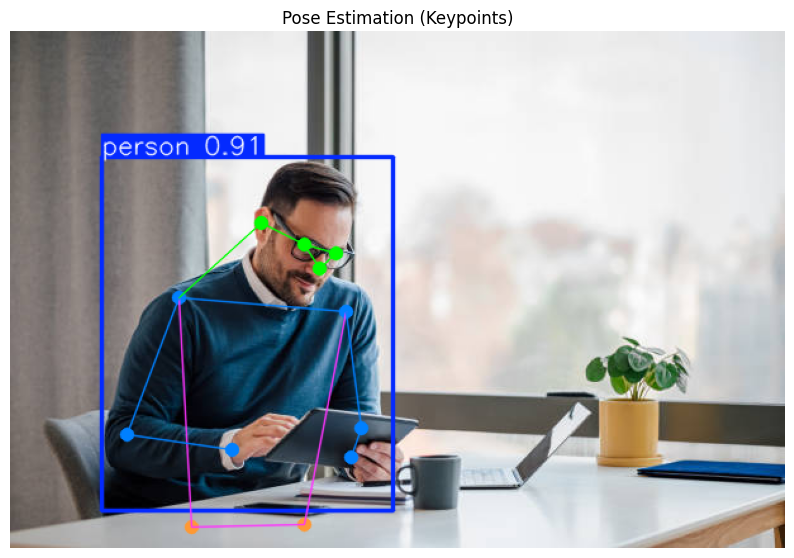

Loading Classification Model...

image 1/1 c:\Users\Admin\Documents\research\tasks\..\assets\test-image.jpg: 224x224 notebook 0.30, laptop 0.07, desk 0.07, restaurant 0.02, monitor 0.02, 20.5ms
Speed: 5.0ms preprocess, 20.5ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


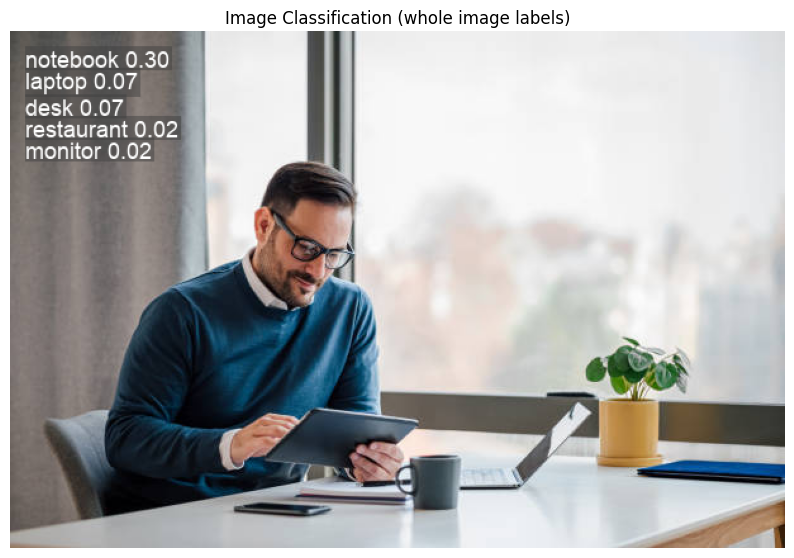

In [7]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# --- CONFIGURATION ---
# Using '..' to step out of 'tasks' folder into 'assets'/'models'
IMAGE_PATH = '../assets/test-image.jpg'
MODEL_DIR = '../models/'

def show_result(image_bgr, title="Result"):
    """Helper to display OpenCV images in Matplotlib"""
    # Convert BGR (OpenCV) to RGB (Matplotlib)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 8))
    plt.imshow(image_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

# --- 1. OBJECT DETECTION (Nano) ---
# Loads yolov8n.pt (Detects boxes)
print("loading Detection Model...")
model_detect = YOLO(os.path.join(MODEL_DIR, 'yolov8n.pt'))
res_detect = model_detect.predict(source=IMAGE_PATH, conf=0.5)
show_result(res_detect[0].plot(), "Object Detection (Boxes)")

# --- 2. INSTANCE SEGMENTATION (Nano) ---
# Loads yolov8n-seg.pt (Detects masks)
print("Loading Segmentation Model...")
model_seg = YOLO(os.path.join(MODEL_DIR, 'yolov8n-seg.pt'))
res_seg = model_seg.predict(source=IMAGE_PATH, conf=0.5)
show_result(res_seg[0].plot(), "Instance Segmentation (Masks)")

# --- 3. POSE ESTIMATION (Skeletons/Keypoints) (Nano) ---
# Loads yolov8n-pose.pt (Detects keypoints)
print("Loading Detection Model...")
model_seg = YOLO(os.path.join(MODEL_DIR, 'yolov8n-pose.pt'))
res_seg = model_seg.predict(source=IMAGE_PATH, conf=0.5)
show_result(res_seg[0].plot(), "Pose Estimation (Keypoints)")

# --- 4. Image classification (whole image labels) (Nano) ---
# Loads yolov8n-cls.pt (Classifies Image)
print("Loading Classification Model...")
model_seg = YOLO(os.path.join(MODEL_DIR, 'yolov8n-cls.pt'))
res_seg = model_seg.predict(source=IMAGE_PATH, conf=0.5)
show_result(res_seg[0].plot(), "Image Classification (whole image labels)")